This notebook simply runs the simulation geometrically. There is no simulation of power or detection, merely the number of rays that hit the detector (a plane with radius ~7mm at z = 79.9) as a function of mirror position. 
Mira Liu 05/26/2019

In [1]:
import numpy as np
import matplotlib.pyplot as pl
import itertools
from mpl_toolkits.mplot3d import Axes3D
from RayTraceFunctions import * 
from random import uniform
import random
import pickle
import math
import time

In [ ]:
#Runs n rays from radius r and collects the number of rays that hit the detector (Ij) at
#the certain mirror position (Delay) and saves the rays (OR)
def RunSourceModulating(Nsize,n,r): 
    thetG = [0,0,0]
    spo = [-160.375,-113.,-80.0] #global CENTERED
    Rays = makerays(spo,thetG,r,n) #sourcethet as [0,0,0]
    Ij = []
    Delay = []
    OR = [[] for i in range(Nsize)]
    j = 0
    for y in np.linspace(-18,18,int(Nsize)):
        PTot=0
        OutRays=RunRaysM(Rays,y) #eight each
        Delay.append(y*0.95630475596*4)
        Ij.append(len(OutRays)) #is just number (dont need Lamd)
        OR[j].append(OutRays)
        j = j+1
    return Delay,Ij,OR

In [ ]:
Timei = time.time()
Freq = 144.3
Lamd = 300/Freq 
Nsize = Nsized(Lamd)
sourcethet = [0.,0.,0.] 
n = 500
r = 0
thetmirr = [.0,0.0,0.0] 
thetpolarz = [[0,0,0],[0,0,0],[0,0,0],[0,0,0]] 
Delay,Ij,ORays = RunSourceModulating(Nsize,n,r) 
Timef = time.time()
print('total time: ~',float(Timef-Timei)/60, 'mins')
pl.plot(Delay,Ij,linewidth = .8)
#pl.tick_params(colors = 'white')
#pl.title('$\lambda$='+str(Lamd),color = 'black')
pl.xlabel('Optical Delay (mm)', color = 'black')
pl.show()

In [ ]:
#saves all as pickle files
with open("GeomIjn500r0"+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + ".pkl", "wb") as F:
    pickle.dump(Ij,F)
with open("GeomDelayn500r0"+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + ".pkl", "wb") as F:
    pickle.dump(Delay,F)
with open("GeomORaysn500r0"+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + ".pkl", "wb") as F:
    pickle.dump(ORays,F)
    
    

In [ ]:
# plots as modulating geometric envelope
with open( 'GeomIjn500r02.07mm_2019_05_07_09_31_31.pkl' , 'rb') as file1:
    Ij1=pickle.load(file1, encoding = 'latin1')
with open( 'GeomDelayn500r02.07mm_2019_05_07_09_31_31.pkl' , 'rb') as file1:
    Delay=pickle.load(file1, encoding = 'latin1')
    
pl.plot(Delay,Ij1/max(np.array(Ij1)),linewidth = .8)
pl.plot(Delay,Ij1/-max(np.array(Ij1)),linewidth = .8)
pl.show()

In [2]:
#Runs n rays from radius r and collects the number of rays that hit the detector (Ij) at
#the certain mirror position (Delay) and saves the rays (OR)
def RunSourceModulating_narrow(Nsize,n,r): 
    thetG = [0,0,0]
    spo = [-160.375,-113.,-80.0] #global CENTERED
    Rays = makerays_Zero_narrow(spo,thetG,r,n) #sourcethet as [0,0,0]
    Ij = []
    Delay = []
    OR = [[] for i in range(Nsize)]
    j = 0
    for y in np.linspace(-18,18,int(Nsize)):
        PTot=0
        OutRays=RunRaysM(Rays,y) #eight each
        Delay.append(y*0.95630475596*4)
        Ij.append(len(OutRays)) #is just number (dont need Lamd)
        OR[j].append(OutRays)
        j = j+1
    return Delay,Ij,OR

total time: ~ 152.0081528464953 mins


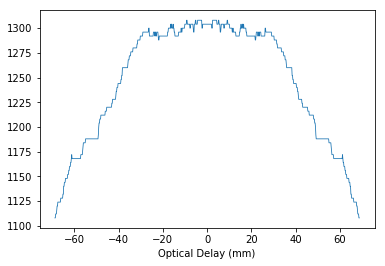

In [3]:
Timei = time.time()
Freq = 144.3
Lamd = 300/Freq 
Nsize = Nsized(Lamd)
sourcethet = [0.,0.,0.] 
n = 500
r = 0
thetmirr = [.0,0.0,0.0] 
thetpolarz = [[0,0,0],[0,0,0],[0,0,0],[0,0,0]] 
Delay,Ij,ORays = RunSourceModulating_narrow(Nsize,n,r) 
Timef = time.time()
print('total time: ~',float(Timef-Timei)/60, 'mins')
pl.plot(Delay,Ij,linewidth = .8)
#pl.tick_params(colors = 'white')
#pl.title('$\lambda$='+str(Lamd),color = 'black')
pl.xlabel('Optical Delay (mm)', color = 'black')
pl.show()

In [ ]:
with open("GeomIjn500r0"+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + ".pkl", "wb") as F:
    pickle.dump(Ij,F)
with open("GeomDelayn500r0"+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + ".pkl", "wb") as F:
    pickle.dump(Delay,F)
#with open("GeomORaysn500r0"+str(2.07)+'mm'+time.strftime("_%Y_%m_%d_%H_%M_%S") + ".pkl", "wb") as F:
    #pickle.dump(ORays,F)

In [ ]:
with open('500Rays_Narrow_20__2019_08_24_13_41_38.pkl','rb') as F:
    Rays1 = pickle.load(F)